# Support Vector Machines

Support Vector Machines (SVM) are a method that uses points in a transformed problem space that best separate classes into two groups. Classification for multiple classes is then supported by a one-vs-all method (just like we previously did for Logistic Regression for Multi Class Classification).

In [1]:
#Data imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#Math
import math

#Plot
#plot import
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

#Machine learning
import sklearn


We need find the optimal line or hyper lane. The line which splits two classes and has a max difference between them.

Let's go ahead and start by defining the Hyperplane in this case with the equation of a line, where Beta tranposed is the known weight vector of the features we've seen before and Beta nought is the bias.

    f(x)=β0+βTx
    f(x)=β0+βTx

There are an infinite number of ways we could scale the weight vector and the bias, but remember we want to maximize the margin between the two classes. So we realize through some math (explained in detail the videos below) can set this as:

    |β0+βTx|=1
    |β0+βTx|=1

where x symbolizes the training examples closest to the hyperplane. In general, the training examples that are closest to the hyperplane are called support vectors. These support vectors are filled in with color in the image above. This representation is known as the canonical hyperplane.

From geometry we know that the distance betweeen a point x and the hyperplane (Beta,Beta0)is:

    distance=|β0+βTx|||β||.
    distance=|β0+βTx|||β||.

In particular, for the canonical hyperplane, the numerator is equal to one and the distance to the support vectors is

distance support vectors=|β0+βTx|||β||=1||β||
distance support vectors=|β0+βTx|||β||=1||β||

Recall that the margin introduced in the previous section, here denoted as M, is twice the distance to the closest examples:

        M=2||β||
        M=2||β||
Finally, the problem of maximizing M is equivalent to the problem of minimizing a function L(Beta) subject to some constraints. The constraints model the requirement for the hyperplane to classify correctly all the training examples xi.

Formally,

       minβ,β0L(β)=12||β||2 subject to yi(βTxi+β0)≥1 ∀i
       minβ,β0L(β)=12||β||2 subject to yi(βTxi+β0)≥1 ∀i
where yi represents each of the labels of the training examples.

In [2]:
#import from csv
nyc_sub = pd.read_csv('C:/Users/aswat/nyc_subway_weather.csv')

In [3]:
nyc_sub.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42647.000000,42647.000000,42647.000000,42647.000000,42648.000000,42648.000000,42648.000000,42648.000000,...,42648.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000
mean,2.812486e+07,1.986993e+07,1886.648862,1361.523859,10.046381,2.905691,0.714430,40.724648,-73.940366,0.009825,...,29.971095,0.224752,63.103735,6.927711,0.004618,29.971097,63.103968,6.927782,40.728558,-73.938698
std,3.043607e+07,2.028986e+07,2952.441710,2183.890279,6.938864,2.079250,0.451691,0.071650,0.059712,0.098632,...,0.137943,0.417424,8.455722,4.510216,0.016345,0.131159,6.939119,3.179879,0.065421,0.059581
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.500000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


In [4]:
df1 = nyc_sub.copy()
#drop rows with NA
df1.dropna(inplace = True)
df1.apply(lambda x: sum(x.isnull()),axis=0)

UNIT               0
DATEn              0
TIMEn              0
ENTRIESn           0
EXITSn             0
ENTRIESn_hourly    0
EXITSn_hourly      0
datetime           0
hour               0
day_week           0
weekday            0
station            0
latitude           0
longitude          0
conds              0
fog                0
precipi            0
pressurei          0
rain               0
tempi              0
wspdi              0
meanprecipi        0
meanpressurei      0
meantempi          0
meanwspdi          0
weather_lat        0
weather_lon        0
dtype: int64

In [5]:
nyc_data = df1[['fog','precipi','pressurei','rain','tempi','wspdi']]

In [6]:
nyc_target = df1[['conds']]

In [7]:
nyc_complete = pd.concat([nyc_data,nyc_target],axis=1)

In [8]:
nyc_complete.head()

,fog,precipi,pressurei,rain,tempi,wspdi,conds
0,0.0,0.0,30.22,0.0,55.9,3.5,Clear
1,0.0,0.0,30.25,0.0,52.0,3.5,Partly Cloudy
2,0.0,0.0,30.28,0.0,62.1,6.9,Mostly Cloudy
3,0.0,0.0,30.26,0.0,57.9,15.0,Mostly Cloudy
4,0.0,0.0,30.28,0.0,52.0,10.4,Mostly Cloudy


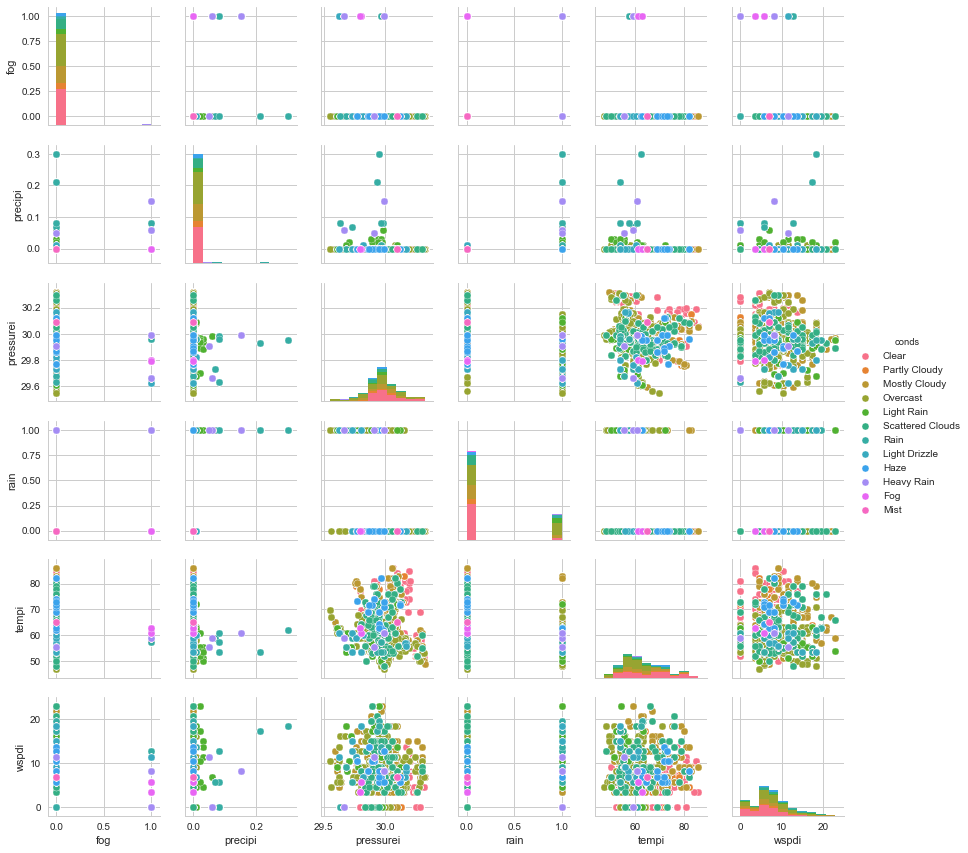

In [9]:
sns.pairplot(nyc_complete,hue='conds',size=2)

In [10]:
X = nyc_data
Y = nyc_target
Y = np.ravel(Y)

In [11]:
from sklearn.svm import SVC

In [12]:
model = SVC()

In [13]:
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,Y)

In [14]:
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
from sklearn import metrics

In [16]:
predicted = model.predict(X_test)

In [17]:
print(metrics.accuracy_score(Y_test,predicted))

0.830988557494


In [18]:
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.4,random_state=3)
model.fit(X_train,Y_train)
predicted = model.predict(X_test)
print(metrics.accuracy_score(Y_test,predicted))

0.820681165367


The accuracy changes based on the randomn state and size of the data set.

# Kernel Types

The four methods we will explore are two linear models, a Gaussian Radial Basis Function,and a SVC with a polynomial (3rd Degree) kernel.

The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. This can be a consequence of the following differences:

1.LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.

2.LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

In [19]:
from sklearn import svm

In [20]:
# we are taking only the first two data set of the X
X = df1[['fog','precipi']]

#function to change the conds to integer

def conds(cond):
    if cond == 'clear':
        return 0
    elif cond == 'Fog':
        return 1
    elif cond == 'Haze':
        return 2
    elif cond == 'Heavy Rain':
        return 3
    elif cond == 'Light Drizzle':
        return 4
    elif cond == 'Light Rain':
        return 5
    elif cond == 'Mist':
        return 6
    elif cond == 'Mostly Cloudy':
        return 7
    elif cond == 'Overcast':
        return 8
    elif cond == 'Partly Cloudy':
        return 9
    elif cond == 'Scattered Clouds':
        return 10
    else:
        return 11

    
    
#enabling

nyc_target['conds'] = nyc_target['conds'].apply(conds)


    

C:\Users\aswat\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
nyc_target.head()
Y=nyc_target
Y.head()


,conds
0,11
1,9
2,7
3,7
4,7


In [22]:
Y = np.ravel(Y)
Y

array([11,  9,  7, ..., 11, 11, 11], dtype=int64)

In [23]:
#Reguralization parameter
C = 1.0

In [24]:
# linear fit
#not splitting into training and testing, since only checking the how this SVM works
#SVC

svc = svm.SVC(kernel='linear',C=C).fit(X,Y)

In [25]:
#Radial Basis Function

rbf_svc = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)

In [26]:
# SVC with a polynomial (3rd Degree)

poly_svc = svm.SVC(kernel='poly',degree=3,C=C).fit(X,Y)

In [27]:
#linear SVC

lin_svc = svm.LinearSVC(C=C).fit(X,Y)

# Mesh Grid

In [28]:
# As explained in Scikit learn documents we will be creating a mesh grid

#step size
h=0.02

#fitting the x axis
x_min = X.values[:,0].min() -1
x_max = X.values[:,0].max() +1

#fitting the y axis(taking the next column)
y_min = X.values[:,1].min() -1
y_max = X.values[:,1].max() +1

In [29]:
#mesh grid
xx , yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [30]:
#plot titles
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

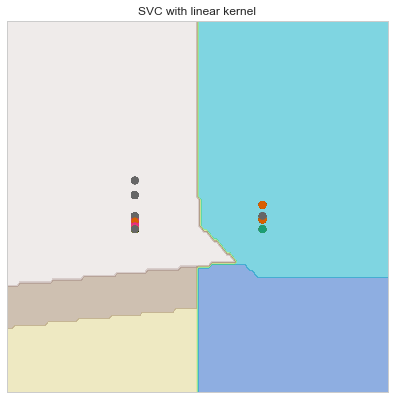

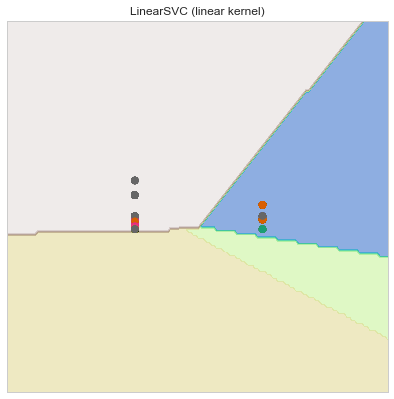

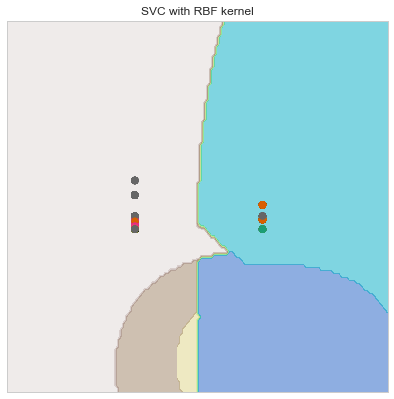

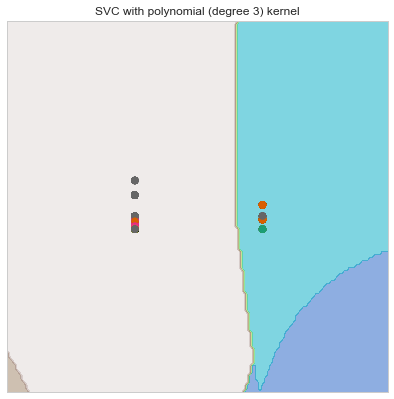

In [31]:
# go through each model, set its position as a subplot, then scatter the data points and a countour of the decision boundaries.

for i,clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    
    plt.figure(figsize=(15,15))
    
    plt.subplot(2,2,i+1)
    
    #numpy.c_ is used translates the sliced objects in a concatenation along the second axis.
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5)
    
    plt.scatter(X.values[:,0],X.values[:,1],c=nyc_target,cmap=plt.cm.Dark2)
    
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])    
    